# Predicting Water Pump Functionality in Tanzania (HydroLogic Project)
Authored by Farzaneh Gerami, Subaye Opoku-Acquah & Mariam Farda | 
March – June 2025

# Imports

In [4280]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway

import math

import datetime

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency, ttest_ind # checking if the data is random or depends on other

import joblib


# Sprint 1 - Data Cleaning and Preprocessing

## Read Merged Data

In [4281]:
# Read Merged data as an original data
url_merge_data = "../data/processed/Merged_Training_Set.csv"
df_train_original = pd.read_csv(url_merge_data)
df_train_original.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4282]:
df_train_original.shape

(59400, 41)

# Split the data to 80% train and 20%validate

In [4283]:
# split using train_test_split with shuffled=False to preserve order
train_size = int(len(df_train_original) * 0.8)
df_train = df_train_original.iloc[:train_size]
df_test = df_train_original.iloc[train_size:]

# Save the splits
df_train.to_csv("../data/processed/Merged_Training_data.csv", index=False)
df_test.to_csv("../data/processed/Merged_Test_data.csv", index=False)

In [4284]:
df_test.shape

(11880, 41)

In [4285]:
df_train.shape

(47520, 41)

In [4286]:
# make a copy of the original dataset
df_train = df_train.copy()
df_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,34684,0.0,2012-10-04,Dwsp,0,DWE,33.457381,-3.552051,Kwa Mzee Hemu,0,...,salty,salty,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,functional
47516,8766,0.0,2013-02-07,Unhcr,1321,TWESA,30.592280,-3.733459,Gwamba Luchenje,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
47517,22662,0.0,2013-02-24,Cdtf,1306,DWE,35.262273,-9.831219,Kwa Stephan,0,...,soft,good,dry,dry,river,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
47518,39854,50.0,2011-03-23,Parastatal,-13,Da,38.979195,-6.519993,Msikitini,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional


In [4287]:
# df_train.dtypes

## Feature Summary

In [4288]:
# Basic summary statics
def feature_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Zero Values': (df == 0).sum(),
        'Unique Values': df.nunique()
    })
    # Add Percent of Missing Values
    summary['% Missing'] = (summary['Missing Values'] / len(df)) * 100
    
    # Classify Feature Type
    def classify_feature(col):
        if df[col].dtype == 'object':
            return 'Categorical'
        elif df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() < 15:
                return 'Ordinal/Categorical'
            return 'Numerical'
        elif df[col].dtype == 'bool':
            return 'Boolean'
        elif 'date' in col:
            return 'Date'
        else:
            return 'Other'
    # Applies the classifier to each column.
    summary['Feature Type'] = summary.index.to_series().apply(classify_feature)
    return summary.sort_values(by='Missing Values', ascending=False)

# Run the summary
feature_summary(df_train)


,Data Type,Missing Values,Zero Values,Unique Values,% Missing,Feature Type
scheme_name,object,22523,0,2513,47.396886,Categorical
scheme_management,object,3125,0,12,6.576178,Categorical
installer,object,2909,0,1901,6.121633,Categorical
funder,object,2889,0,1679,6.079545,Categorical
public_meeting,object,2651,4086,2,5.578704,Categorical
permit,object,2426,14044,2,5.105219,Categorical
subvillage,object,298,0,17242,0.627104,Categorical
payment,object,0,0,7,0.000000,Categorical
waterpoint_type_group,object,0,0,6,0.000000,Categorical
extraction_type_group,object,0,0,13,0.000000,Categorical


In [4289]:
# make a list of the columns with missing values
summary = feature_summary(df_train)

missing_columns = summary[summary['Missing Values'] > 0].index.tolist()
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
['scheme_name', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage']


## Convert date_recorded to datetime

In [4290]:
# Convert date_recorded to datetime
df_train['date_recorded'] = pd.to_datetime(df_train['date_recorded'], errors='coerce')

# Remove invalid years
df_train.loc[df_train['construction_year'] < 1900, 'construction_year'] = pd.NA

# Convert the year into datetime (January 1st of the year)
df_train['construction_year'] = pd.to_datetime(
    df_train['construction_year'], format='%Y', errors='coerce'
)

In [4291]:
# Extract date features
df_train['year_recorded'] = df_train['date_recorded'].dt.year
df_train['month_recorded'] = df_train['date_recorded'].dt.month
df_train['dayofweek_recorded'] = df_train['date_recorded'].dt.dayofweek


# Clean and Convert public_meeting


In [4292]:
# Convert to string, clean casing and spaces, then map to booleans
df_train['public_meeting'] = df_train['public_meeting'].astype(str).str.strip().str.lower()
df_train['public_meeting'] = df_train['public_meeting'].map({'true': True, 'false': False})
df_train['public_meeting'] = df_train['public_meeting'].astype('boolean')

## Clean and Convert permit to boolean


In [4293]:
# Clean and Convert permit
df_train['permit'] = df_train['permit'].astype(str).str.strip().str.lower()
df_train['permit'] = df_train['permit'].map({'true': True, 'false': False})
df_train['permit'] = df_train['permit'].astype('boolean')

# Check for Nulls


view all the rows with Standard missing values

In [4294]:
print("\nMissing values:")
missing_counts = df_train.isnull().sum().sort_values(ascending=False)
print(missing_counts)


Missing values:
scheme_name              22523
construction_year        16600
scheme_management         3125
installer                 2909
funder                    2889
public_meeting            2651
permit                    2426
subvillage                 298
quantity                     0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
source                       0
quantity_group               0
extraction_type_class        0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
year_recorded                0
month_recorded               0
management                   0
id                           0
extraction_type_group        0
extraction_type              0
date_recorded                0
gps_height                   0
longitude                    0
latitude              

find rows with placeholder missing strings

In [4295]:
# Create a list of columns with missing values
missing_columns = missing_counts[missing_counts > 0].index.tolist()
print("\nColumns with missing values:")
print(missing_columns)


Columns with missing values:
['scheme_name', 'construction_year', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage']


# showing the categorical columns

In [4296]:
# showing the categorical columns
categorical_col = df_train.select_dtypes(include=['object', 'category', 'boolean']).columns
missing_info = pd.DataFrame({
    'Data Type': df_train[categorical_col].dtypes,
    'Missing %': (df_train[categorical_col].isnull().mean()*100)
})
missing_info = missing_info.sort_values(by= 'Missing %', ascending=False)
print(missing_info)

                      Data Type  Missing %
scheme_name              object  47.396886
scheme_management        object   6.576178
installer                object   6.121633
funder                   object   6.079545
public_meeting          boolean   5.578704
permit                  boolean   5.105219
subvillage               object   0.627104
water_quality            object   0.000000
quality_group            object   0.000000
quantity                 object   0.000000
quantity_group           object   0.000000
payment                  object   0.000000
source                   object   0.000000
source_type              object   0.000000
source_class             object   0.000000
waterpoint_type          object   0.000000
waterpoint_type_group    object   0.000000
payment_type             object   0.000000
extraction_type_class    object   0.000000
management_group         object   0.000000
management               object   0.000000
extraction_type_group    object   0.000000
extraction_

## Impute Missing Values

## Checking for duplication

## Quantity and quantity_group duplication

In [4297]:
# to check duplication between the quantity and quantity group
df_train['quantity_match'] = df_train['quantity'] == df_train['quantity_group']

match_counts = df_train['quantity_match'].value_counts()
print(match_counts)

True    47520
Name: quantity_match, dtype: int64


In [4298]:
mismatches = df_train[df_train['quantity_match'] == False][['quantity', 'quantity_group']]
print(mismatches.head())

Empty DataFrame
Columns: [quantity, quantity_group]
Index: []


In [4299]:
match_rate = df_train['quantity_match'].mean() * 100
print(f"Match Rate: {match_rate:.2f}%")

Match Rate: 100.00%


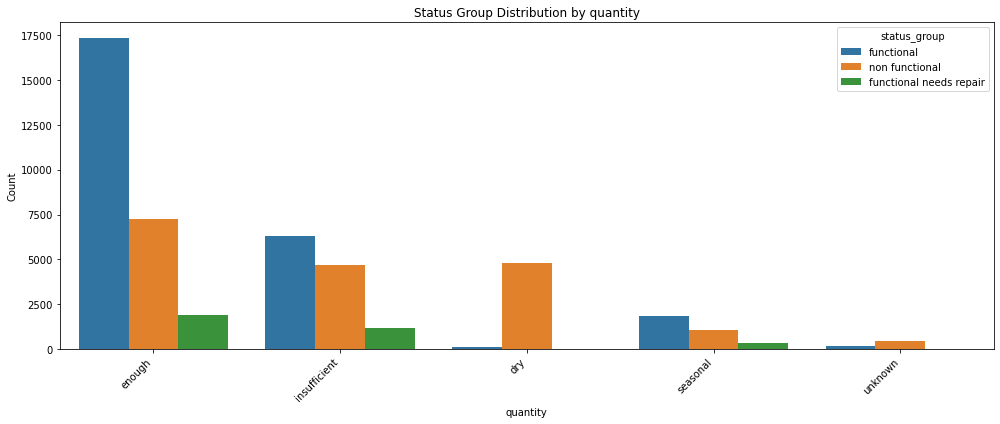

In [4300]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='quantity', hue='status_group')
plt.title("Status Group Distribution by quantity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("quantity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

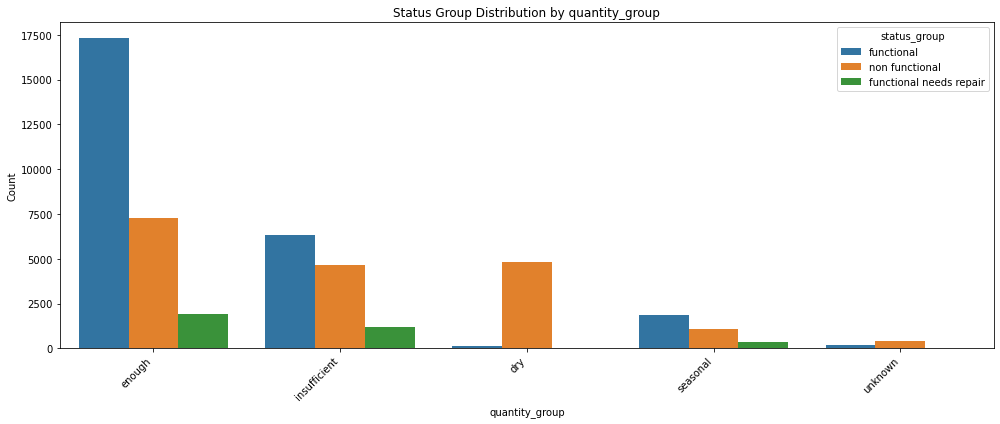

In [4301]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='quantity_group', hue='status_group')
plt.title("Status Group Distribution by quantity_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("quantity_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: Yes, they are both similar and i drop the quantity_group

## extraction_type and extraction_type_group and extraction_type_class duplication

In [4302]:
# looks for the mismatch between extraction_type and extraction_type_group
mismatched = df_train[df_train['extraction_type'].astype(str) != df_train['extraction_type_group'].astype(str)]
# Show a few rows where they differ
mismatched[['extraction_type', 'extraction_type_group']].head(10)

,extraction_type,extraction_type_group
31,ksb,submersible
45,windmill,wind-powered
66,other - rope pump,rope pump
88,ksb,submersible
92,ksb,submersible
96,ksb,submersible
147,other - rope pump,rope pump
155,other - swn 81,other handpump
172,ksb,submersible
193,ksb,submersible


In [4303]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['extraction_type', 'extraction_type_group']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


             extraction_type extraction_type_group  count
2                        ksb           submersible   1107
5          other - rope pump             rope pump    363
6             other - swn 81        other handpump    179
8                   windmill          wind-powered     89
0                       cemo       other motorpump     74
4          other - play pump        other handpump     73
7                     walimi        other handpump     35
1                     climax       other motorpump     22
3  other - mkulima/shinyanga        other handpump      1


In [4304]:
matched = df_train[df_train['extraction_type'] == df_train['extraction_type_group']]
# Show a few rows where they differ
mismatched[['extraction_type', 'extraction_type_group']].head(10)

,extraction_type,extraction_type_group
31,ksb,submersible
45,windmill,wind-powered
66,other - rope pump,rope pump
88,ksb,submersible
92,ksb,submersible
96,ksb,submersible
147,other - rope pump,rope pump
155,other - swn 81,other handpump
172,ksb,submersible
193,ksb,submersible


In [4305]:
# Count how often each mismatch occurs
match_summary = matched.groupby(['extraction_type', 'extraction_type_group']).size().reset_index(name='count')
print(match_summary.sort_values(by='count', ascending=False))


  extraction_type extraction_type_group  count
1         gravity               gravity  21415
5     nira/tanira           nira/tanira   6578
6           other                 other   5106
7     submersible           submersible   3834
8          swn 80                swn 80   2959
4            mono                  mono   2306
2   india mark ii         india mark ii   1910
0         afridev               afridev   1391
3  india mark iii        india mark iii     78


My conclusion is that i can drop this column as it is so similar to eachother but the extraction_type_group is with less detailed. The same i observe for the waterpoint_type and waterpoint_type_group, and i decided to keep the waterpoint_type_group. 

In [4306]:
# duplicate between 'extraction_type', 'extraction_type_group', 'extraction_type_class'
columns = ['extraction_type', 'extraction_type_group', 'extraction_type_class']

for col in columns:
    print(f"\n {col} — Unique Values and Frequencies:\n{'-'*50}")
    
    # Get value counts (number and percent)
    counts = df_train[col].value_counts(dropna=False)
    percentages = df_train[col].value_counts(normalize=True, dropna=False) * 100

    # Combine into a single DataFrame
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    
    # Print top values
    print(summary.head(10)) 



 extraction_type — Unique Values and Frequencies:
--------------------------------------------------
                   Count  Percentage
gravity            21415       45.07
nira/tanira         6578       13.84
other               5106       10.74
submersible         3834        8.07
swn 80              2959        6.23
mono                2306        4.85
india mark ii       1910        4.02
afridev             1391        2.93
ksb                 1107        2.33
other - rope pump    363        0.76

 extraction_type_group — Unique Values and Frequencies:
--------------------------------------------------
                Count  Percentage
gravity         21415       45.07
nira/tanira      6578       13.84
other            5106       10.74
submersible      4941       10.40
swn 80           2959        6.23
mono             2306        4.85
india mark ii    1910        4.02
afridev          1391        2.93
rope pump         363        0.76
other handpump    288        0.61

 extract

In [4307]:
# Create a column to flag mismatches
df_train['extraction_mismatch'] = ~(
    (df_train['extraction_type'] == df_train['extraction_type_group']) &
    (df_train['extraction_type'] == df_train['extraction_type_class']) &
    (df_train['extraction_type_group'] == df_train['extraction_type_class'])
)

#Filter mismatched rows
mismatches = df_train[df_train['extraction_mismatch']][[
    'extraction_type', 'extraction_type_group', 'extraction_type_class'
]]

#Summarize mismatch patterns
mismatch_summary = mismatches.groupby([
    'extraction_type', 'extraction_type_group', 'extraction_type_class'
]).size().reset_index(name='count').sort_values(by='count', ascending=False)

# print top 10 mismatch patterns
print(mismatch_summary.head(10))


      extraction_type extraction_type_group extraction_type_class  count
7         nira/tanira           nira/tanira              handpump   6578
12             swn 80                swn 80              handpump   2959
6                mono                  mono             motorpump   2306
3       india mark ii         india mark ii              handpump   1910
0             afridev               afridev              handpump   1391
5                 ksb           submersible           submersible   1107
10  other - rope pump             rope pump             rope pump    363
11     other - swn 81        other handpump              handpump    179
14           windmill          wind-powered          wind-powered     89
4      india mark iii        india mark iii              handpump     78


So i decided to keep the less details classification. Later we need to check if there is any relation between the extraction_type_class and the target

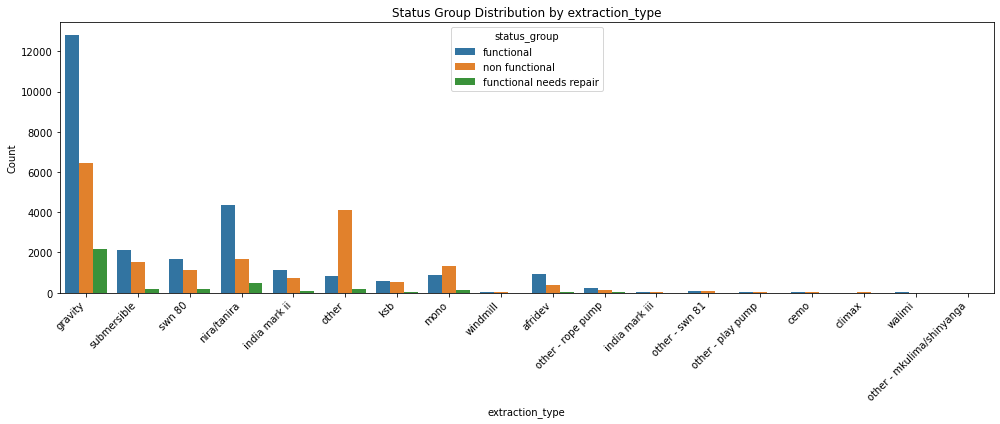

In [4308]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type', hue='status_group')
plt.title("Status Group Distribution by extraction_type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

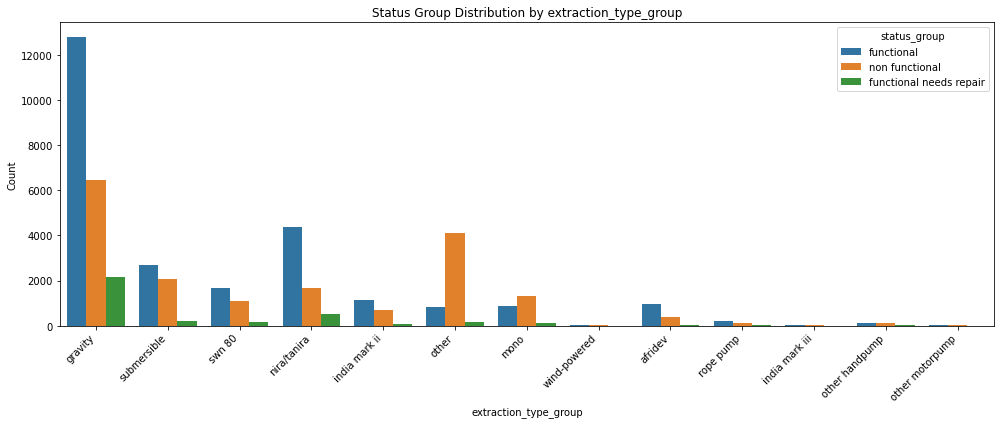

In [4309]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type_group', hue='status_group')
plt.title("Status Group Distribution by extraction_type_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

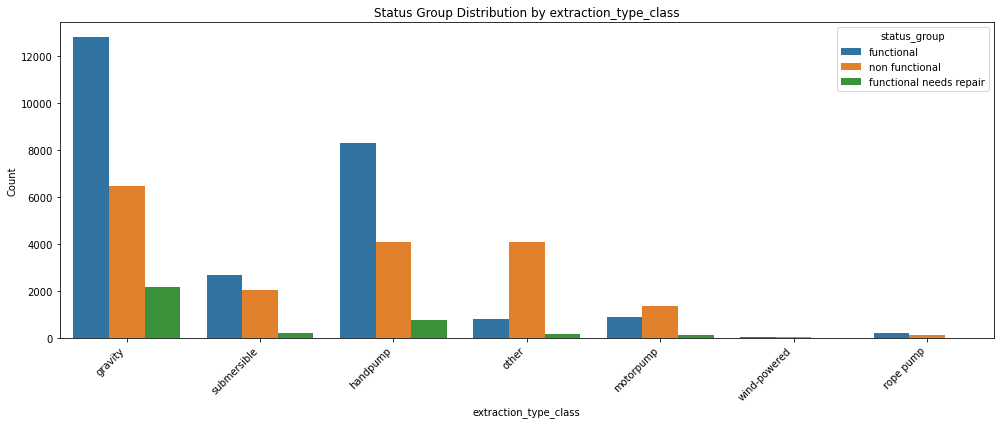

In [4310]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type_class', hue='status_group')
plt.title("Status Group Distribution by extraction_type_class")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type_class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: we decided to keep the extraction_type_class as it more comprehensive and drop the extraction_type and extraction_type_group.. 

## waterpoint_type and waterpoint_type_group duplication

In [4311]:
# Calculate row-wise match
match_mask = df_train['waterpoint_type'] == df_train['waterpoint_type_group']

# Percentage of exact matches
match_percentage = match_mask.mean() * 100
print(f"Match Rate: {match_percentage:.2f}%")

# Count of matching vs mismatching rows
match_counts = match_mask.value_counts()
print("\nMatch vs Mismatch Counts:")
print(match_counts)

# show mismatched combinations
mismatches = df_train[~match_mask][['waterpoint_type', 'waterpoint_type_group']]
mismatch_summary = mismatches.groupby(
    ['waterpoint_type', 'waterpoint_type_group']
).size().reset_index(name='count').sort_values(by='count', ascending=False)

print("\nTop Mismatch Patterns:")
print(mismatch_summary.head(10))


Match Rate: 89.66%

Match vs Mismatch Counts:
True     42607
False     4913
dtype: int64

Top Mismatch Patterns:
               waterpoint_type waterpoint_type_group  count
0  communal standpipe multiple    communal standpipe   4913


In [4312]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['waterpoint_type', 'waterpoint_type_group']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


               waterpoint_type waterpoint_type_group  count
1           communal standpipe    communal standpipe   1015
4                    hand pump             hand pump    565
2  communal standpipe multiple    communal standpipe    298
5                        other                 other     61
0                cattle trough         cattle trough      3
3                          dam                   dam      1


interpretation: they are almost similar. in waterpoint_type there is one type communal standpoint multiple that it is changed to communal standpipe in the other. So i prefer to keep the waterpoint_type maybe this multiple type has any impact on functionality of pupm.

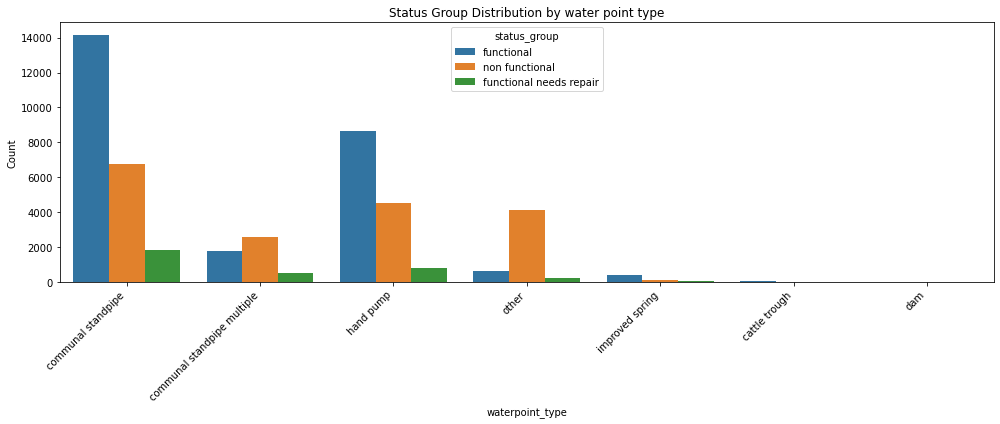

In [4313]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='waterpoint_type', hue='status_group')
plt.title("Status Group Distribution by water point type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("waterpoint_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

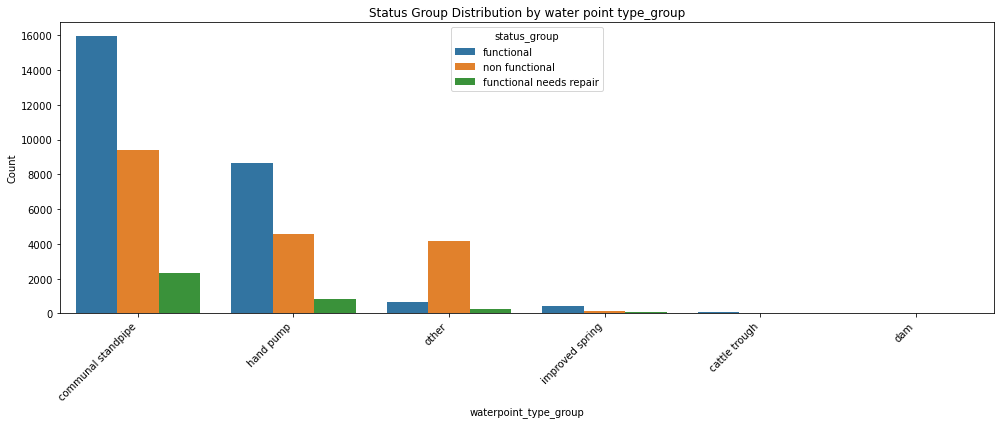

In [4314]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='waterpoint_type_group', hue='status_group')
plt.title("Status Group Distribution by water point type_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("waterpoint_type_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Source and Source_type duplication

In [4315]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['source', 'source_type']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


                 source           source_type  count
6                 river            river/lake    669
3           machine dbh              borehole    428
7          shallow well          shallow well    304
8                spring                spring    152
0                   dam                   dam    131
2                  lake            river/lake    107
1              hand dtw              borehole     97
5  rainwater harvesting  rainwater harvesting     52
4                 other                 other      2
9               unknown                 other      1


In [4316]:
# Check for exact matches
match_mask = df_train['source'] == df_train['source_type']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'source' and 'source_type': {match_percentage:.2f}%")

 Match Rate between 'source' and 'source_type': 62.22%


In [4317]:
# View mismatch patterns
mismatches = df_train[~match_mask][['source', 'source_type']]
mismatch_summary = mismatches.groupby(['source', 'source_type']).size().reset_index(name='count')
print("\nTop mismatches:")
print(mismatch_summary.sort_values(by='count', ascending=False).head(10))


Top mismatches:
        source source_type  count
2  machine dbh    borehole   8886
3        river  river/lake   7686
0     hand dtw    borehole    723
1         lake  river/lake    613
4      unknown       other     46


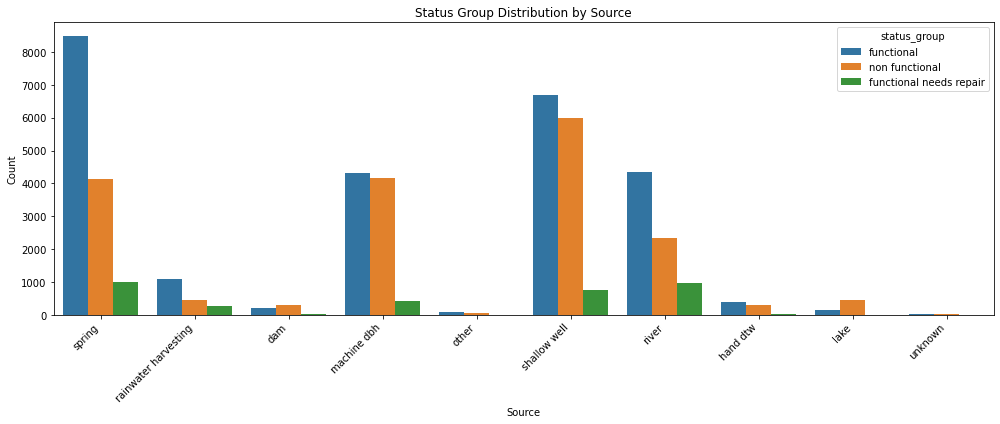

In [4318]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='source', hue='status_group')
plt.title("Status Group Distribution by Source")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Source")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

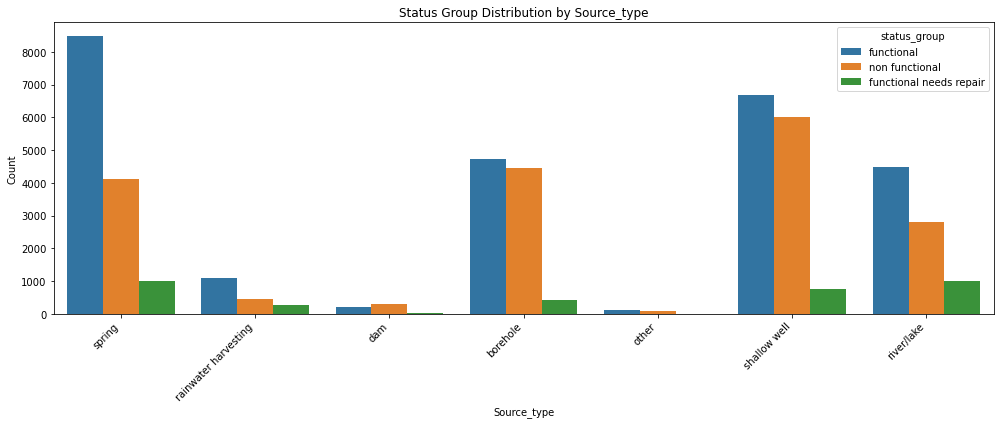

In [4319]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='source_type', hue='status_group')
plt.title("Status Group Distribution by Source_type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Source_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: I think i will keep the source and delete the source type. They are similar and the relation between them and the status group also is similar but in source the river and lake are seperated and their relation with target is also different.

## Payment and Peyment_type duplication

In [4320]:
# Check for exact matches
match_mask = df_train['payment'] == df_train['payment_type']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'payment' and 'payment_type': {match_percentage:.2f}%")

 Match Rate between 'payment' and 'payment_type': 58.07%


In [4321]:
# View mismatch patterns
mismatches = df_train[~match_mask][['payment', 'payment_type']]
mismatch_summary = mismatches.groupby(['payment', 'payment_type']).size().reset_index(name='count')
print("\nTop mismatches:")
print(mismatch_summary.sort_values(by='count', ascending=False).head(10))


Top mismatches:
                 payment payment_type  count
2         pay per bucket   per bucket   7205
1            pay monthly      monthly   6637
3  pay when scheme fails   on failure   3155
0           pay annually     annually   2927


Interpretation: payment and payment_type are similar better to drop payment as the classification topic is better in payment_type.

# Installer and Funder

In [4322]:
df_train['installer'] = df_train['installer'].astype(str).str.strip().str.lower()
df_train['funder'] = df_train['funder'].astype(str).str.strip().str.lower()

In [4323]:
# Check for exact matches
match_mask = df_train['installer'] == df_train['funder']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'installer' and 'funder': {match_percentage:.2f}%")

 Match Rate between 'installer' and 'funder': 37.75%


Interpretation: I think we need to keep both

In [4324]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,dayofweek_recorded,quantity_match,extraction_mismatch
0,69572,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,none,0,...,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,0,True,False
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,Zahanati,0,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,2,True,False
2,34310,25.0,2013-02-25,lottery club,686,world vision,37.460664,-3.821329,Kwa Mahundi,0,...,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,0,True,False
3,67743,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,0,True,False
4,19728,0.0,2011-07-13,action in a,0,artisan,31.130847,-1.825359,Shuleni,0,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,2,True,False


## Drop columns

In [4325]:
# Drop some column
columns_to_drop = ['recorded_by', 'num_private', 'quantity_group', 'extraction_type', 'extraction_type_group','waterpoint_type_group', 'source_type', 'payment', 'quantity_match', 'extraction_mismatch']
df_train.drop(columns = columns_to_drop, inplace = True)
print('droped successfuly!')

droped successfuly!


In [4326]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group,year_recorded,month_recorded,dayofweek_recorded
0,69572,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,none,Lake Nyasa,...,soft,good,enough,spring,groundwater,communal standpipe,functional,2011,3,0
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,Zahanati,Lake Victoria,...,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,3,2
2,34310,25.0,2013-02-25,lottery club,686,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,soft,good,enough,dam,surface,communal standpipe multiple,functional,2013,2,0
3,67743,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,2013,1,0
4,19728,0.0,2011-07-13,action in a,0,artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,7,2


# Handling missing values

In [4327]:
missing_counts = df_train.isna().sum().sort_values(ascending=False)
missing_counts

scheme_name              22523
construction_year        16600
scheme_management         3125
public_meeting            2651
permit                    2426
subvillage                 298
waterpoint_type              0
source_class                 0
source                       0
quantity                     0
status_group                 0
water_quality                0
payment_type                 0
management_group             0
management                   0
extraction_type_class        0
year_recorded                0
month_recorded               0
quality_group                0
id                           0
amount_tsh                   0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin                        0
wpt_name                     0
latitude                     0
longitude                    0
installer                    0
gps_heig

In [4328]:
for col in df_train.columns:
    print(f"\nUnique values in column '{col}':")
    print(df_train[col].unique())


Unique values in column 'id':
[69572  8776 34310 ... 22662 39854 45078]

Unique values in column 'amount_tsh':
[6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03 1.63e+04 8.00e+02 1.60e+04 3.00e+04 5.30e+01
 5.40e+03 7.00e+04 2.50e+05 2.00e+05 2.60e+04 1.80e+04 2.60e+01 5.90e+02
 9.00e+02 9.00e+00 1.40e+03 1.70e+05 2.20e+02]

Unique values in column 'date_recorde

In [4329]:
missing_na = df_train.isna().sum().sort_values(ascending=False)
missing_na


scheme_name              22523
construction_year        16600
scheme_management         3125
public_meeting            2651
permit                    2426
subvillage                 298
waterpoint_type              0
source_class                 0
source                       0
quantity                     0
status_group                 0
water_quality                0
payment_type                 0
management_group             0
management                   0
extraction_type_class        0
year_recorded                0
month_recorded               0
quality_group                0
id                           0
amount_tsh                   0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin                        0
wpt_name                     0
latitude                     0
longitude                    0
installer                    0
gps_heig

In [4330]:
# Define common non-standard missing values
placeholders = ['NaN', 'nan', 'N/A', 'null', 'None', '?', '']

# Apply replacement only to object (string) columns
for col in df_train.select_dtypes(include='object').columns:
    df_train[col] = df_train[col].replace(placeholders, np.nan)

In [4331]:
missing_na = df_train.isna().sum().sort_values(ascending=False)
missing_na


c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


scheme_name              23044
construction_year        16600
scheme_management         3126
installer                 2909
funder                    2889
public_meeting            2651
permit                    2426
subvillage                 298
wpt_name                     2
water_quality                0
month_recorded               0
management                   0
management_group             0
payment_type                 0
quantity                     0
quality_group                0
year_recorded                0
extraction_type_class        0
source_class                 0
waterpoint_type              0
status_group                 0
source                       0
id                           0
amount_tsh                   0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin                        0
latitude                     0
longitud

In [4332]:
print(df_train.isna().sum()[df_train.isna().sum() > 0])


funder                2889
installer             2909
wpt_name                 2
subvillage             298
public_meeting        2651
scheme_management     3126
scheme_name          23044
permit                2426
construction_year    16600
dtype: int64


### Check the Type of Each Column

In [4333]:
# Show types of columns with missing values
missing_cols = df_train.columns[df_train.isnull().any()]
print(df_train[missing_cols].dtypes)

funder                       object
installer                    object
wpt_name                     object
subvillage                   object
public_meeting              boolean
scheme_management            object
scheme_name                  object
permit                      boolean
construction_year    datetime64[ns]
dtype: object


### Explore the Distribution and Value Counts

In [4334]:
for col in missing_cols:
    print(f"\n {col} value counts:")
    print(df_train[col].value_counts(dropna=False).head(10))



 funder value counts:
government of tanzania    7283
NaN                       2889
danida                    2496
hesawa                    1773
world bank                1106
rwssp                     1086
kkkt                      1038
world vision              1008
unicef                     858
district council           686
Name: funder, dtype: int64

 installer value counts:
dwe                   13981
NaN                    2909
government             1500
hesawa                 1130
rwe                     945
commu                   846
danida                  829
district council        781
kkkt                    735
central government      636
Name: installer, dtype: int64

 wpt_name value counts:
none               2883
Shuleni            1400
Zahanati            671
Msikitini           400
Kanisani            256
Sokoni              211
Bombani             205
Ofisini             203
Shule Ya Msingi     165
School              161
Name: wpt_name, dtype: int64

 subvilla

True     40783
False     4086
NaN       2651
Name: public_meeting, dtype: Int64

 scheme_management value counts:
VWC                 29436
WUG                  4148
NaN                  3126
Water authority      2532
WUA                  2289
Water Board          2204
Parastatal           1346
Company               868
Private operator      843
Other                 596
Name: scheme_management, dtype: int64

 scheme_name value counts:
NaN                            23044
K                                556
Borehole                         444
Chalinze wate                    327
M                                310
DANIDA                           291
Government                       261
Ngana water supplied scheme      225
wanging'ombe water supply s      223
wanging'ombe supply scheme       187
Name: scheme_name, dtype: int64

 permit value counts:
True     31050
False    14044
NaN       2426
Name: permit, dtype: Int64

 construction_year value counts:
NaT           16600
2010-01-0

### Check Dependency with Other Features (Chi-square and T-test)

In [4335]:

cat_cols = df_train.select_dtypes(include=['object', 'category', 'bool']).columns
num_cols = df_train.select_dtypes(include=['number']).columns

for target_col in missing_cols:
    mask = df_train[target_col].isnull()
    print(f"\n Analyzing missingness in: {target_col}")

    # Chi-square for categorical
    for cat_col in cat_cols:
        if cat_col != target_col and cat_col not in missing_cols and df_train[cat_col].nunique() > 1:
            contingency = pd.crosstab(df_train[cat_col], mask)
            if contingency.shape[1] == 2:
                chi2, p, _, _ = chi2_contingency(contingency)
                if p < 0.05:
                    print(f" Dependent on categorical: {cat_col} (p={p:.4f})")

    # T-test for numerical
    for num_col in num_cols:
        if num_col != target_col and num_col not in missing_cols:
            group1 = df_train.loc[mask, num_col].dropna()
            group2 = df_train.loc[~mask, num_col].dropna()
            if len(group1) > 10 and len(group2) > 10:
                t_stat, p = ttest_ind(group1, group2, equal_var=False)
                if p < 0.05:
                    print(f" Dependent on numerical: {num_col} (p={p:.4f})")



 Analyzing missingness in: funder
 Dependent on categorical: basin (p=0.0000)
 Dependent on categorical: region (p=0.0000)
 Dependent on categorical: lga (p=0.0000)
 Dependent on categorical: ward (p=0.0000)
 Dependent on categorical: extraction_type_class (p=0.0000)
 Dependent on categorical: management (p=0.0000)
 Dependent on categorical: management_group (p=0.0000)
 Dependent on categorical: payment_type (p=0.0000)
 Dependent on categorical: water_quality (p=0.0000)
 Dependent on categorical: quality_group (p=0.0000)
 Dependent on categorical: quantity (p=0.0000)
 Dependent on categorical: source (p=0.0000)
 Dependent on categorical: source_class (p=0.0000)
 Dependent on categorical: waterpoint_type (p=0.0000)
 Dependent on categorical: status_group (p=0.0000)
 Dependent on numerical: gps_height (p=0.0000)
 Dependent on numerical: longitude (p=0.0000)
 Dependent on numerical: latitude (p=0.0000)
 Dependent on numerical: region_code (p=0.0000)
 Dependent on numerical: population (p

Interpretation: You found that all columns with missing values are strongly dependent on other features (p ≈ 0.0000), so the data is Missing At Random (MAR).This justifies group-based or model-based imputations — not naive (mean/mode) filling.

### Visual Check of Missingness Correlation

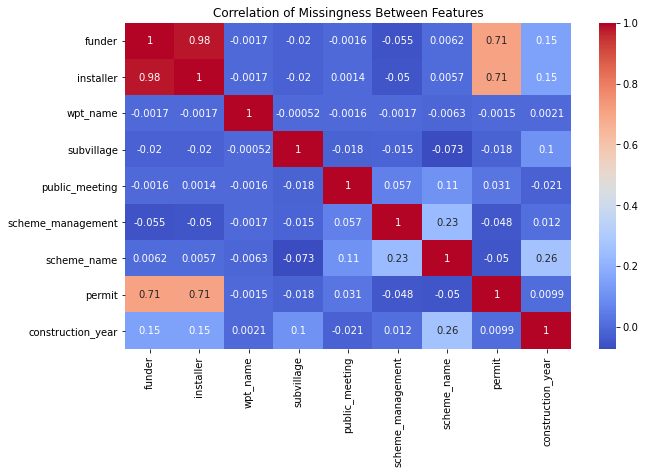

In [4336]:
# Create a binary missingness matrix
missing_indicator = df_train[missing_cols].isnull().astype(int)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_indicator.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation of Missingness Between Features")
plt.show()

interpritation: 

## Imputing the values 

## Chi-square tests for categorical features and t-tests for numerical features, checking whether their distribution is associated with missing values in each column

we need to determine whether data is missing completely at random (MCAR) or if missingness is related to other variables, which is critical for deciding how to handle missing values. 

Chi-square for categorical.
T-test for numerical.

In [4343]:

# Identify columns with missing values
cols_with_missing = df_train.columns[df_train.isna().any()].tolist()
cols_with_missing

['funder',
 'installer',
 'wpt_name',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year']

In [4344]:
# Identify missing columns (excluding ID or target if needed)
cols_with_missing = df_train.columns[df_train.isnull().any()].tolist()

# Separate feature types
categorical_cols = df_train.select_dtypes(include=['object', 'category', 'bool']).columns
numerical_cols = df_train.select_dtypes(include=['number']).columns

# Initialize result collectors
chi2_results = []
ttest_results = []

# Loop over each missing column
for col in cols_with_missing:
    print(f"\nAnalyzing missingness in: {col}")
    missing_mask = df_train[col].isnull()

    # Chi-square for categorical variables
    for cat_col in categorical_cols:
        if cat_col != col and df_train[cat_col].nunique() > 1:
            contingency = pd.crosstab(df_train[cat_col], missing_mask)
            if contingency.shape[1] == 2:  # Make sure we have True/False columns
                try:
                    chi2, p, _, _ = chi2_contingency(contingency)
                    chi2_results.append({'missing_in': col, 'feature': cat_col, 'p_value': p})
                except Exception as e:
                    print(f"Chi2 failed for {col} vs {cat_col}: {e}")

    # T-test for numerical variables
    for num_col in numerical_cols:
        if num_col != col:
            group_missing = df_train.loc[missing_mask, num_col].dropna()
            group_not_missing = df_train.loc[~missing_mask, num_col].dropna()
            if len(group_missing) > 10 and len(group_not_missing) > 10:
                try:
                    t_stat, p = ttest_ind(group_missing, group_not_missing, equal_var=False)
                    ttest_results.append({'missing_in': col, 'feature': num_col, 'p_value': p})
                except Exception as e:
                    print(f"T-test failed for {col} vs {num_col}: {e}")





Analyzing missingness in: funder

Analyzing missingness in: installer

Analyzing missingness in: wpt_name

Analyzing missingness in: subvillage

Analyzing missingness in: public_meeting

Analyzing missingness in: scheme_management

Analyzing missingness in: scheme_name

Analyzing missingness in: permit

Analyzing missingness in: construction_year


# why I did this: this shows why data is missing. if it is MCAR i can drop missing data or impute with simple methods.
# if MAR or MNAR then i need more advanced imputation (like modeling or multiple imputation)

 A low p_value (commonly < 0.05) means that the missingness in one column is statistically likely to depend on the values in another column.

In [4345]:
# Create result DataFrames
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p_value')
ttest_df = pd.DataFrame(ttest_results).sort_values(by='p_value')

# Show top associations
print("\n Top Categorical Dependencies (Chi-square):")
print(chi2_df[chi2_df['p_value'] < 0.05].head())

print("\n Top Numerical Dependencies (T-test):")
print(ttest_df[ttest_df['p_value'] < 0.05].head())


 Top Categorical Dependencies (Chi-square):
      missing_in     feature  p_value
0         funder   installer      0.0
132  scheme_name      funder      0.0
133  scheme_name   installer      0.0
135  scheme_name       basin      0.0
136  scheme_name  subvillage      0.0

 Top Numerical Dependencies (T-test):
           missing_in        feature  p_value
60        scheme_name    region_code      0.0
30         subvillage  year_recorded      0.0
79  construction_year     gps_height      0.0
72             permit  district_code      0.0
28         subvillage  district_code      0.0


Interpretation: A p-value of 0 means that the null hypothesis ("The distribution of the feature is the same for missing and non-missing rows.") is strongly rejected.So, The feature is strongly associated with whether the value is missing — the data is not missing completely at random (Not MCAR).This suggests the missingness is Missing at Random (MAR) — it’s dependent on other observed features. So, imputation must consider other variables — using simple methods like mean/median imputation could introduce bias.
Model-based or conditional imputation is more appropriate.

# Impute funder by grouping with region, lga and ward

In [4346]:
#Group by region/lga/ward and apply mode imputation
df_train['funder'] = df_train.groupby(['region', 'lga', 'ward'])['funder'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )
#Fill any remaining missing values with the global mode
if df_train['funder'].isnull().any():
        overall_mode = df_train['funder'].mode()[0]
        df_train['funder'].fillna(overall_mode, inplace=True)

# Impute installer grouping with funder and region

In [4347]:
#Group by region/lga/ward and apply mode imputation
df_train['installer'] = df_train.groupby(['region', 'funder'])['installer'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )
#Fill any remaining missing values with the global mode
if df_train['installer'].isnull().any():
        overall_mode = df_train['installer'].mode()[0]
        df_train['installer'].fillna(overall_mode, inplace=True)

### Impute wpt_name with unknown 

In [4348]:
df_train['wpt_name'] = df_train['wpt_name'].fillna("unknown")
print("wpt_name missing values filled sucessfully!")

wpt_name missing values filled sucessfully!


### Impute subvillage missing values grouping with ward and lga

In [4349]:
#Group by lga/ward and apply mode imputation
df_train['subvillage'] = df_train.groupby(['lga', 'ward'])['funder'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )
#Fill any remaining missing values with the global mode
if df_train['subvillage'].isnull().any():
        overall_mode = df_train['subvillage'].mode()[0]
        df_train['subvillage'].fillna(overall_mode, inplace=True)

### Impute Public_meeting missing values by grouping with region and ward

In [4350]:
# group by region and ward and apply mode imputation
df_train['public_meeting'] = df_train.groupby(['region', 'ward'])['public_meeting'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# fill any remaining missing values with the global mode
if df_train['public_meeting'].isnull().any():
    overall_mode = df_train['public_meeting'].mode()[0]
    df_train['public_meeting'].fillna(overall_mode, inplace=True)

### Impute scheme_name missing values by grouping with region and basin

In [4351]:
# group by region and ward and apply mode imputation
df_train['scheme_name'] = df_train.groupby(['basin', 'region', 'longitude', 'latitude'])['scheme_name'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# fill any remaining missing values with the global mode
if df_train['scheme_name'].isnull().any():
    overall_mode = df_train['scheme_name'].mode()[0]
    df_train['scheme_name'].fillna(overall_mode, inplace=True)

### Impute scheme_management missing values by grouping with schemen_name and source

In [4352]:
# Group by scheme_name, source, and region (no leading space)
df_train['scheme_management'] = df_train.groupby(['scheme_name', 'source', 'region'])['scheme_management'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# Fill any remaining missing values with the global mode
if df_train['scheme_management'].isnull().any():
    overall_mode = df_train['scheme_management'].mode()[0]
    df_train['scheme_management'].fillna(overall_mode, inplace=True)


### Impute permit missing values by grouping with region and source

In [4353]:
# group by region and ward and apply mode imputation
df_train['permit'] = df_train.groupby(['region', 'source'])['scheme_management'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# fill any remaining missing values with the global mode
if df_train['permit'].isnull().any():
    overall_mode = df_train['permit'].mode()[0]
    df_train['permit'].fillna(overall_mode, inplace=True)

# Impute construction_year using Iterative Imputer

In [4354]:
# Convert construction_year to integer
# Extract year from datetime
df_train['construction_year_numeric'] = df_train['construction_year'].dt.year


In [4355]:
# Impute using numerical version and related predictors
# Select numerical columns for imputation
impute_cols = ['construction_year_numeric', 'population', 'latitude', 'longitude', 'gps_height']
impute_df = df_train[impute_cols]

# Apply Iterative Imputer
imp = IterativeImputer(estimator=BayesianRidge(), random_state=42, max_iter=10)
imputed_array = imp.fit_transform(impute_df)

# Assign imputed values back
df_train[impute_cols] = imputed_array

In [4356]:
# Convert back to datetime (round and clip if necessary to valid ranges)
df_train['construction_year'] = pd.to_datetime(df_train['construction_year_numeric'].round().astype(int), format='%Y', errors='coerce')

# Optionally drop the helper column
df_train.drop(columns=['construction_year_numeric'], inplace=True)


In [4357]:
missing_counts = df_train.isna().sum().sort_values(ascending=False)
missing_counts

id                       0
amount_tsh               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
status_group             0
year_recorded            0
month_recorded           0
scheme_name              0
scheme_management        0
public_meeting           0
wpt_name                 0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
population               0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
dayofweek_recorded       0
dtype: int64

# Manage Zero Values

In [4358]:
zero_columns = [col for col in df_train.columns if (df_train[col] == 0).sum() > 0 and df_train[col].dtype in ['int64', 'float64']]
zero_columns
zero_columns.remove('id')


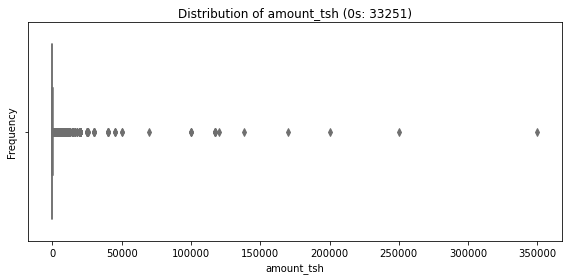

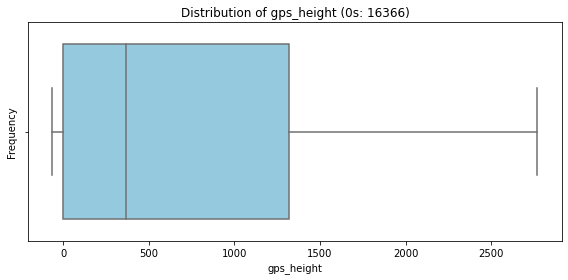

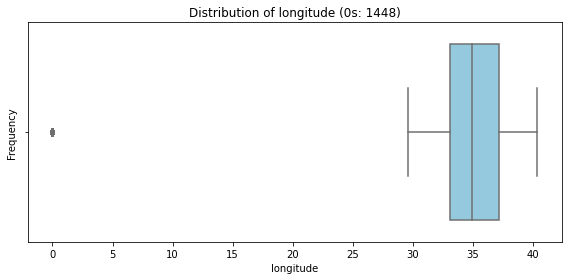

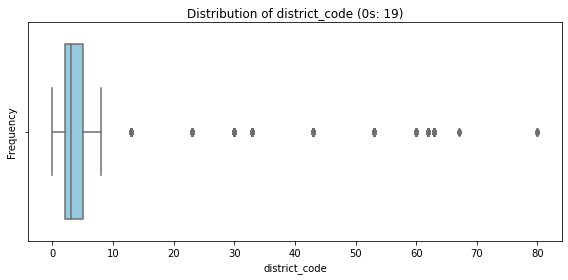

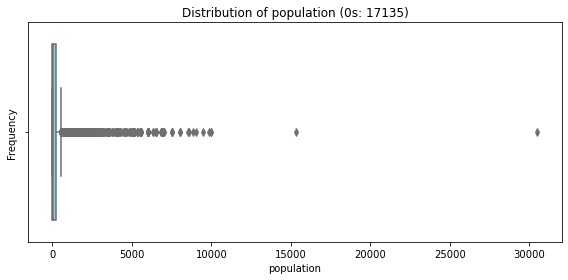

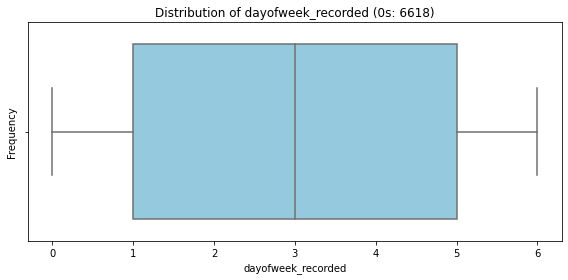

In [4359]:
for col in zero_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_train[col], color='skyblue')
    plt.title(f'Distribution of {col} (0s: {(df_train[col] == 0).sum()})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



## Statistical Indicators of Outliers

### Check if 0 Is Outside Typical Range (Using IQR)

In [4360]:
def is_zero_outlier(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    return 0 < lower_bound


In [4361]:
for col in df_train.select_dtypes(include='number'):
    if 0 in df_train[col].values and is_zero_outlier(df_train[col]):
        print(f"0 might be an outlier in column: {col}")


0 might be an outlier in column: longitude


### Distribution Analysis to check if 0 is far from Mean

In [4362]:
for col in df_train.select_dtypes(include='number'):
    if 0 in df_train[col].values:
        mean = df_train[col].mean()
        std = df_train[col].std()
        z_score = abs((0 - mean) / std)
        if z_score > 3:
            print(f"0 is a statistical outlier in column: {col} (z-score: {z_score:.2f})")

0 is a statistical outlier in column: longitude (z-score: 5.19)


### Apply for Longitude

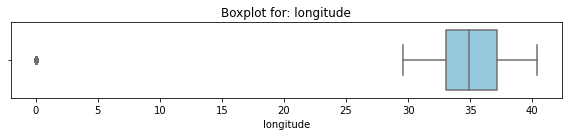

In [4363]:
# Initial Boxplot of longitude (before fixing)
col = 'longitude'
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_train['longitude'], color='skyblue')
plt.title(f'Boxplot for: {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

In [4364]:
# Replace 0s with NaN (assumed invalid for Tanzania)
df_train['longitude'] = df_train['longitude'].replace(0, np.nan)

# Impute with random values within Tanzania’s longitude range (29.2 to 40.4)
df_train['longitude'] = df_train['longitude'].apply(
    lambda x: np.random.uniform(29.2, 40.4) if pd.isna(x) else x
)


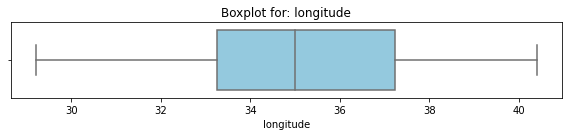

In [4365]:
# Initial Boxplot of longitude (before fixing)
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_train['longitude'], color='skyblue')
plt.title(f'Boxplot for: {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

# check if the 0 is a placeholder

In [4366]:
for col in df_train.select_dtypes(include='number'):
    zero_pct = (df_train[col] == 0).mean()
    if zero_pct > 0.1 and df_train[col].mean() > 0:  # Likely placeholder
        print(f"0 in {col} may be placeholder (zero_pct: {zero_pct:.2%})")


0 in amount_tsh may be placeholder (zero_pct: 69.97%)
0 in gps_height may be placeholder (zero_pct: 34.44%)
0 in population may be placeholder (zero_pct: 36.06%)
0 in dayofweek_recorded may be placeholder (zero_pct: 13.93%)


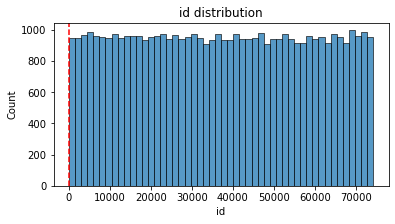

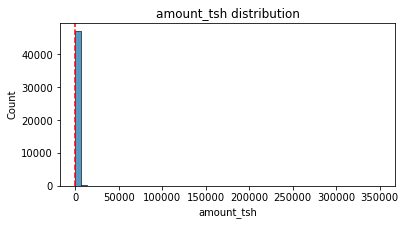

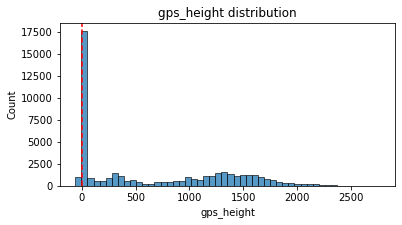

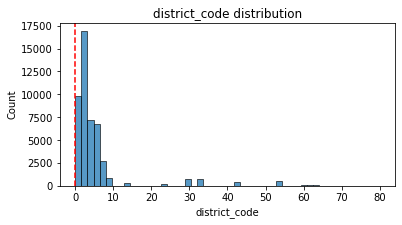

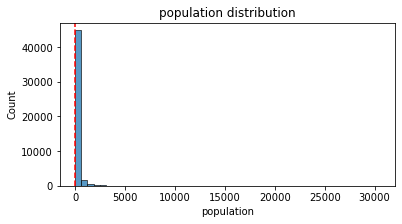

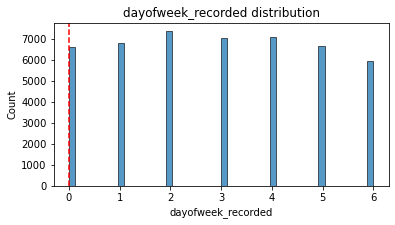

In [4367]:
# visual Clues

for col in df_train.select_dtypes(include='number'):
    if 0 in df_train[col].values:
        plt.figure(figsize=(6, 3))
        sns.histplot(df_train[col], bins=50)
        plt.title(f'{col} distribution')
        plt.axvline(0, color='red', linestyle='--')
        plt.show()


## Save the cleaned data and read and check if there is any missing values

In [4368]:
df_train.to_csv("../data/processed/cleaned_Training_data.csv", index=False)

In [4369]:
df_train_cleaned= pd.read_csv("../data/processed/cleaned_Training_data.csv")

In [4370]:

# Identify columns with missing values
cols_with_missing = df_train_cleaned.columns[df_train.isna().any()].tolist()
cols_with_missing

[]

In [4371]:
missing_counts = df_train_cleaned.isnull().sum().sort_values(ascending=False)
missing_counts


id                       0
amount_tsh               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
status_group             0
year_recorded            0
month_recorded           0
scheme_name              0
scheme_management        0
public_meeting           0
wpt_name                 0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
population               0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
dayofweek_recorded       0
dtype: int64

In [4372]:
df_train_cleaned.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group,year_recorded,month_recorded,dayofweek_recorded
0,69572,6000.0,2011-03-14,roman,1390.0,roman,34.938093,-9.856322,none,Lake Nyasa,...,soft,good,enough,spring,groundwater,communal standpipe,functional,2011,3,0
1,8776,0.0,2013-03-06,grumeti,1399.0,grumeti,34.698766,-2.147466,Zahanati,Lake Victoria,...,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,3,2
2,34310,25.0,2013-02-25,lottery club,686.0,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,soft,good,enough,dam,surface,communal standpipe multiple,functional,2013,2,0
3,67743,0.0,2013-01-28,unicef,263.0,unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,soft,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,2013,1,0
4,19728,0.0,2011-07-13,action in a,0.0,artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,7,2


In [4373]:
df_train_cleaned.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_class', 'waterpoint_type', 'status_group',
       'year_recorded', 'month_recorded', 'dayofweek_recorded'],
      dtype='object')